In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import imutils
import time

In [2]:
img = cv2.imread('Files/Chess/chess.png')

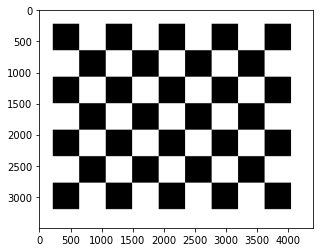

In [3]:
plt.imshow(img[:,:,::-1]);

In [4]:
img_resize = imutils.resize(img, width=500)

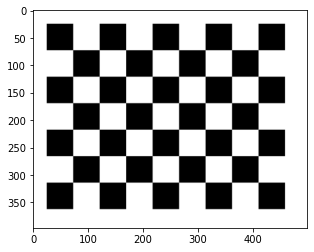

In [5]:
plt.imshow(img_resize[:,:,::-1]);

In [7]:
gray = cv2.cvtColor(img_resize,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray).copy()

In [8]:
start_time = time.time()

dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img_resize[dst>0.01*dst.max()]=[0,0,255]
end_time = time.time() - start_time
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_resize, f"Execution time is {end_time} sec", (25,img_resize.shape[1]-110), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
cv2.imshow('dst',img_resize)
cv2.imwrite(f"Files/chess_corners.jpg",img_resize)
print(f"--- {end_time} seconds ---")

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

--- 0.007950305938720703 seconds ---


In [9]:
img_array = []
for filename in glob.glob('Files/Chess/00*.png'):
    img = cv2.imread(filename)
    img_array.append(img)

In [18]:
img_array[2].shape

(218, 280, 3)

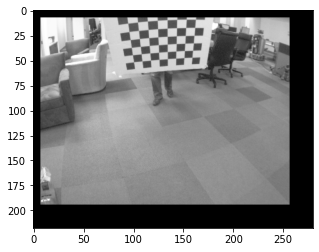

In [11]:
plt.imshow(img_array[2][:,:,::-1]);

In [12]:
def nothing(x):
    pass

In [43]:
cv2.namedWindow('output', cv2.WINDOW_NORMAL)
cv2.createTrackbar('chose_image', 'output', 0, len(img_array)-1, nothing)
cv2.createTrackbar('block_size', 'output', 2, 50, nothing)
cv2.createTrackbar('kernal_size', 'output', 3, 20, nothing)
cv2.createTrackbar('k', 'output', 4, 100, nothing)
cv2.createTrackbar('factor', 'output', 1, 100, nothing)

while 1:
    chose_image = cv2.getTrackbarPos('chose_image', 'output')
    
    x = cv2.getTrackbarPos('block_size', 'output')
    if x==0:
        x = 1
    y = cv2.getTrackbarPos('kernal_size', 'output')
    if y%2==0:
        y += 1
        
    k = cv2.getTrackbarPos('k', 'output')/100
    if k==0:
        k = 0.01
        
    factor = cv2.getTrackbarPos('factor', 'output')/100
    if factor==0:
        factor = 0.01 
    
    copy = img_array[chose_image].copy()
    
    gray = cv2.cvtColor(copy,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    
    start_time = time.time()
    dst = cv2.cornerHarris(gray,x,y,k)
    # result is dilated for marking the corners, not important
    #dst = cv2.dilate(dst,None)
    # Threshold for an optimal value, it may vary depending on the image.
    copy[dst>factor*dst.max()]=[0,0,255]
    end_time = round(time.time() - start_time, 5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(copy, f"Execution time is {end_time} sec", (25,copy.shape[1]-100), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imshow('output',copy)
    
    k = cv2.waitKey(1)
    if k == ord('s'):
        cv2.imwrite(f"Files/00{chose_image+1}_corners.jpg",copy)
    elif k == ord('q'):
        break
    
cv2.destroyAllWindows()  